# COMP402
Code used for Honour's Project Course

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Extrct genotypes

In [2]:
f_genotypes = "no_header_1KGP_40samples.1838.Alu.polyTE.benchmark.recode.txt"

df_g = pd.read_csv(f_genotypes, sep='\t')
df_g

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,HG00129,...,NA18500,NA18532,NA18863,NA19122,NA19474,NA19653,NA19734,NA19775,NA20810,NA20850
0,chr1,1530547,HGSV_233,N,<DEL>,907.0,PASS,END=1530850;SVTYPE=DEL;CHR2=chr1;SVLEN=-303;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:71:0:999:0:999:PE,SR",...,0/1:99:2:138:0:999:1:655:SR,"0/0:99:4:1:0:999:0:999:PE,SR","0/1:99:1:44:0:1:1:263:RD,SR","0/1:1:1:59:0:24:1:1:RD,SR","0/1:99:1:88:1:1:1:113:RD,PE,SR",0/1:99:2:90:0:1:1:515:SR,0/1:99:2:1:0:1:1:347:SR,"0/0:99:4:101:0:999:0:999:PE,SR","0/0:99:3:98:0:999:0:999:PE,SR","0/0:99:2:49:0:999:0:999:RD,PE,SR"
1,chr1,2994984,HGSV_432,N,<DEL>,999.0,PASS,END=2995286;SVTYPE=DEL;CHR2=chr1;SVLEN=-302;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:10:0:999:0:999:PE,SR",...,"0/0:99:2:31:0:999:0:999:RD,PE,SR","0/1:99:1:84:0:23:1:382:RD,SR","0/1:99:1:111:0:27:1:922:RD,SR",0/1:99:2:16:0:1:1:922:SR,"1/1:99:0:112:1:1:2:439:RD,PE,SR","0/0:99:2:113:0:999:0:999:RD,PE,SR","0/1:99:1:124:0:1:1:948:RD,SR","0/0:99:2:151:0:999:0:999:RD,PE,SR","0/0:99:2:66:0:999:0:999:RD,PE,SR","0/0:99:2:71:0:999:0:999:RD,PE,SR"
2,chr1,4095099,HGSV_558,N,<DEL>,999.0,PASS,END=4095400;SVTYPE=DEL;CHR2=chr1;SVLEN=-301;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:2:97:0:999:0:999:RD,PE,SR",...,"0/1:99:1:121:0:1:1:900:RD,SR","0/0:99:2:76:0:999:0:34:RD,PE,SR","0/1:99:1:111:0:27:1:213:RD,SR","0/0:99:2:76:0:999:0:999:RD,PE,SR","1/1:99:0:101:0:1:2:591:RD,SR","0/0:99:2:117:0:999:0:33:RD,PE,SR","0/1:99:1:124:0:1:1:898:RD,SR","0/0:99:2:97:0:999:0:999:RD,PE,SR","0/0:99:2:41:0:999:0:1:RD,PE,SR","0/0:99:2:112:0:999:0:999:RD,PE,SR"
3,chr1,4211149,HGSV_574,N,<DEL>,999.0,PASS,END=4211420;SVTYPE=DEL;CHR2=chr1;SVLEN=-271;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:102:0:999:0:999:PE,SR",...,"0/0:99:2:79:0:999:0:999:RD,PE,SR","0/0:99:3:69:0:999:0:999:PE,SR","0/0:99:3:125:0:999:0:999:PE,SR","0/0:99:2:9:0:999:0:999:RD,PE,SR","0/0:99:2:106:0:999:0:999:RD,PE,SR","0/0:99:3:54:0:999:0:999:PE,SR","0/0:99:3:10:0:999:0:999:PE,SR","0/0:99:3:143:0:999:0:999:PE,SR","0/0:99:3:44:0:999:0:999:PE,SR","0/0:99:3:96:0:999:0:999:PE,SR"
4,chr1,6669214,HGSV_798,N,<DEL>,36.0,PASS,END=6669525;SVTYPE=DEL;CHR2=chr1;SVLEN=-311;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:10:0:999:0:29:PE,SR",...,"0/0:99:2:22:0:999:0:999:RD,PE,SR","0/0:99:3:69:0:999:0:34:PE,SR","0/0:99:2:29:0:999:0:999:RD,PE,SR","0/0:99:2:89:0:999:0:999:RD,PE,SR","0/0:99:2:106:0:999:0:999:RD,PE,SR","0/0:99:3:1:0:999:0:999:PE,SR","0/0:99:2:144:0:999:0:999:RD,PE,SR","0/0:99:3:90:0:999:0:999:PE,SR","0/0:99:2:62:0:999:0:999:RD,PE,SR","0/0:99:2:12:0:999:0:999:RD,PE,SR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,chrX,139302751,HGSV_257109,N,<DEL>,999.0,PASS,END=139303060;SVTYPE=DEL;CHR2=chrX;SVLEN=-309;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/1:1:1:11:1:1:1:1:RD,PE,SR",...,"0/1:99:1:131:0:1:1:557:RD,SR","1/1:99:1:60:1:1:2:689:RD,PE,SR","0/1:99:1:112:0:4:1:922:RD,SR","1/1:38:1:41:1:1:2:38:RD,PE,SR","1/1:99:1:22:1:1:2:845:RD,PE,SR",0/1:1:2:85:0:22:1:1:SR,0/1:99:2:113:0:22:1:496:SR,"1/1:99:1:52:1:1:2:999:RD,PE,SR","0/1:99:1:41:1:1:1:565:RD,PE,SR","0/1:99:1:122:0:1:1:446:RD,SR"
1833,chrX,139859819,HGSV_257145,N,<DEL>,999.0,PASS,END=139860126;SVTYPE=DEL;CHR2=chrX;SVLEN=-307;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:1:119:0:999:0:999:PE,SR",...,"0/1:99:1:1:0:1:1:363:RD,SR","0/0:99:2:23:0:999:0:999:RD,PE,SR","0/1:99:1:1:0:1:1:364:RD,SR","1/1:99:0:76:0:999:3:565:RD,SR","0/1:99:1:88:0:4:1:973:RD,SR","0/0:99:2:29:0:999:0:999:RD,PE,SR",1/1:99:1:92:0:22:2:746:SR,"0/0:99:2:90:0:999:0:999:RD,PE,SR","0/0:99:1:34:0:999:0:999:PE,SR","0/0:99:1:103:0:999:0:999:PE,SR"
1834,chrX,144761767,HGSV_257452,N,<DEL>,999.0,PASS,END=144762060;SVTYPE=DEL;CHR2=chrX;SVLEN=-293;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:1:94:0:999:0:999:PE,SR",...,"0/0:99:1:107:0:999:0:999:PE,SR","0/0:99:3:1:0:999:0:999:PE,SR","0/0:99:2:9:0:999:0:999:RD,PE,SR","

In [3]:
df_g.columns

Index(['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'HG00129', 'HG00131', 'HG00150', 'HG00262', 'HG00615', 'HG00672',
       'HG01067', 'HG01353', 'HG01398', 'HG01774', 'HG02004', 'HG02080',
       'HG02136', 'HG02221', 'HG02275', 'HG02406', 'HG02409', 'HG02524',
       'HG02589', 'HG02667', 'HG02794', 'HG03305', 'HG03557', 'HG03772',
       'HG03902', 'HG03951', 'HG04131', 'HG04142', 'HG04227', 'NA12287',
       'NA18500', 'NA18532', 'NA18863', 'NA19122', 'NA19474', 'NA19653',
       'NA19734', 'NA19775', 'NA20810', 'NA20850'],
      dtype='object')

In [4]:
discard_list = df_g.columns.tolist()[2:7]
print("discard_list:",discard_list)
for discard in discard_list:
    del df_g[discard]
df_g

discard_list: ['ID', 'REF', 'ALT', 'QUAL', 'FILTER']


,#CHROM,POS,INFO,FORMAT,HG00129,HG00131,HG00150,HG00262,HG00615,HG00672,...,NA18500,NA18532,NA18863,NA19122,NA19474,NA19653,NA19734,NA19775,NA20810,NA20850
0,chr1,1530547,END=1530850;SVTYPE=DEL;CHR2=chr1;SVLEN=-303;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:71:0:999:0:999:PE,SR","0/0:99:4:122:0:999:0:999:PE,SR","0/0:99:4:43:0:999:0:999:PE,SR","0/0:99:3:133:0:999:0:999:PE,SR",0/1:72:2:111:0:3:1:72:SR,0/1:1:2:75:0:27:1:1:SR,...,0/1:99:2:138:0:999:1:655:SR,"0/0:99:4:1:0:999:0:999:PE,SR","0/1:99:1:44:0:1:1:263:RD,SR","0/1:1:1:59:0:24:1:1:RD,SR","0/1:99:1:88:1:1:1:113:RD,PE,SR",0/1:99:2:90:0:1:1:515:SR,0/1:99:2:1:0:1:1:347:SR,"0/0:99:4:101:0:999:0:999:PE,SR","0/0:99:3:98:0:999:0:999:PE,SR","0/0:99:2:49:0:999:0:999:RD,PE,SR"
1,chr1,2994984,END=2995286;SVTYPE=DEL;CHR2=chr1;SVLEN=-302;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:10:0:999:0:999:PE,SR","0/0:99:1:73:0:999:0:999:PE,SR","0/0:99:2:68:0:999:0:999:RD,PE,SR","0/0:99:2:1:0:999:0:999:RD,PE,SR","0/0:99:2:10:0:999:0:999:RD,PE,SR","1/1:99:0:112:1:1:2:596:RD,PE,SR",...,"0/0:99:2:31:0:999:0:999:RD,PE,SR","0/1:99:1:84:0:23:1:382:RD,SR","0/1:99:1:111:0:27:1:922:RD,SR",0/1:99:2:16:0:1:1:922:SR,"1/1:99:0:112:1:1:2:439:RD,PE,SR","0/0:99:2:113:0:999:0:999:RD,PE,SR","0/1:99:1:124:0:1:1:948:RD,SR","0/0:99:2:151:0:999:0:999:RD,PE,SR","0/0:99:2:66:0:999:0:999:RD,PE,SR","0/0:99:2:71:0:999:0:999:RD,PE,SR"
2,chr1,4095099,END=4095400;SVTYPE=DEL;CHR2=chr1;SVLEN=-301;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:2:97:0:999:0:999:RD,PE,SR","0/1:99:1:128:1:1:1:314:RD,PE,SR","0/0:99:2:123:0:999:0:999:RD,PE,SR","0/0:99:2:112:0:999:0:999:RD,PE,SR","0/1:99:1:70:0:999:1:460:RD,SR","0/0:99:2:44:0:999:0:999:RD,PE,SR",...,"0/1:99:1:121:0:1:1:900:RD,SR","0/0:99:2:76:0:999:0:34:RD,PE,SR","0/1:99:1:111:0:27:1:213:RD,SR","0/0:99:2:76:0:999:0:999:RD,PE,SR","1/1:99:0:101:0:1:2:591:RD,SR","0/0:99:2:117:0:999:0:33:RD,PE,SR","0/1:99:1:124:0:1:1:898:RD,SR","0/0:99:2:97:0:999:0:999:RD,PE,SR","0/0:99:2:41:0:999:0:1:RD,PE,SR","0/0:99:2:112:0:999:0:999:RD,PE,SR"
3,chr1,4211149,END=4211420;SVTYPE=DEL;CHR2=chr1;SVLEN=-271;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:102:0:999:0:999:PE,SR","0/0:99:3:1:0:999:0:999:PE,SR","0/0:99:2:25:0:999:0:999:RD,PE,SR","0/0:99:2:110:0:999:0:999:RD,PE,SR","0/0:99:2:28:0:999:0:999:RD,PE,SR","0/0:99:2:16:0:999:0:999:RD,PE,SR",...,"0/0:99:2:79:0:999:0:999:RD,PE,SR","0/0:99:3:69:0:999:0:999:PE,SR","0/0:99:3:125:0:999:0:999:PE,SR","0/0:99:2:9:0:999:0:999:RD,PE,SR","0/0:99:2:106:0:999:0:999:RD,PE,SR","0/0:99:3:54:0:999:0:999:PE,SR","0/0:99:3:10:0:999:0:999:PE,SR","0/0:99:3:143:0:999:0:999:PE,SR","0/0:99:3:44:0:999:0:999:PE,SR","0/0:99:3:96:0:999:0:999:PE,SR"
4,chr1,6669214,END=6669525;SVTYPE=DEL;CHR2=chr1;SVLEN=-311;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:10:0:999:0:29:PE,SR","0/0:99:2:147:0:999:0:999:RD,PE,SR","0/0:99:2:134:0:999:0:999:RD,PE,SR","0/0:99:2:143:0:999:0:999:RD,PE,SR","0/0:99:2:115:0:999:0:999:RD,PE,SR","0/0:99:2:130:0:999:0:999:RD,PE,SR",...,"0/0:99:2:22:0:999:0:999:RD,PE,SR","0/0:99:3:69:0:999:0:34:PE,SR","0/0:99:2:29:0:999:0:999:RD,PE,SR","0/0:99:2:89:0:999:0:999:RD,PE,SR","0/0:99:2:106:0:999:0:999:RD,PE,SR","0/0:99:3:1:0:999:0:999:PE,SR","0/0:99:2:144:0:999:0:999:RD,PE,SR","0/0:99:3:90:0:999:0:999:PE,SR","0/0:99:2:62:0:999:0:999:RD,PE,SR","0/0:99:2:12:0:999:0:999:RD,PE,SR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,chrX,139302751,END=139303060;SVTYPE=DEL;CHR2=chrX;SVLEN=-309;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/1:1:1:11:1:1:1:1:RD,PE,SR","0/1:99:1:1:0:3:1:606:RD,SR","1/1:99:1:116:1:1:2:417:RD,PE,SR","0/1:99:1:94:1:1:1:753:RD,PE,SR","1/1:99:1:95:1:1:2:218:RD,PE,SR","0/1:99:2:1:1:1:1:746:PE,SR",...,"0/1:99:1:131:0:1:1:557:RD,SR","1/1:99:1:60:1:1:2:689:RD,PE,SR","0/1:99:1:112:0:4:1:922:RD,SR","1/1:38:1:41:1:1:2:38:RD,PE,SR","1/1:99:1:22:1:1:2:845:RD,PE,SR",0/1:1:2:85:0:22:1:1:SR,0/1:99:2:113:0:22:1:496:SR,"1/1:99:1:52:1:1:2:999:RD,PE,SR

In [5]:
HG_list = df_g.columns.tolist()[4:]
for sample in HG_list:
    df_g[sample] = df_g[sample].str.split(":", expand=True)[0]
df_g

,#CHROM,POS,INFO,FORMAT,HG00129,HG00131,HG00150,HG00262,HG00615,HG00672,...,NA18500,NA18532,NA18863,NA19122,NA19474,NA19653,NA19734,NA19775,NA20810,NA20850
0,chr1,1530547,END=1530850;SVTYPE=DEL;CHR2=chr1;SVLEN=-303;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/1,0/1,...,0/1,0/0,0/1,0/1,0/1,0/1,0/1,0/0,0/0,0/0
1,chr1,2994984,END=2995286;SVTYPE=DEL;CHR2=chr1;SVLEN=-302;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/0,1/1,...,0/0,0/1,0/1,0/1,1/1,0/0,0/1,0/0,0/0,0/0
2,chr1,4095099,END=4095400;SVTYPE=DEL;CHR2=chr1;SVLEN=-301;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/1,0/0,0/0,0/1,0/0,...,0/1,0/0,0/1,0/0,1/1,0/0,0/1,0/0,0/0,0/0
3,chr1,4211149,END=4211420;SVTYPE=DEL;CHR2=chr1;SVLEN=-271;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
4,chr1,6669214,END=6669525;SVTYPE=DEL;CHR2=chr1;SVLEN=-311;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,chrX,139302751,END=139303060;SVTYPE=DEL;CHR2=chrX;SVLEN=-309;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/1,0/1,1/1,0/1,1/1,0/1,...,0/1,1/1,0/1,1/1,1/1,0/1,0/1,1/1,0/1,0/1
1833,chrX,139859819,END=139860126;SVTYPE=DEL;CHR2=chrX;SVLEN=-307;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/0,0/1,...,0/1,0/0,0/1,1/1,0/1,0/0,1/1,0/0,0/0,0/0
1834,chrX,144761767,END=144762060;SVTYPE=DEL;CHR2=chrX;SVLEN=-293;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/0,0/1,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1835,chrX,146248394,END=146248692;SVTYPE=DEL;CHR2=chrX;SVLEN=-298;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/1,0/1,0/0,0/1,1/1,...,0/1,1/1,0/0,1/1,0/1,1/1,0/1,0/0,0/1,0/0


In [6]:
print(['locus', 'position', 'end', 'sample', 'genotype', 'REF_grey_reads',
       'ALT_grey_reads', 'TOTAL-grey_reads', 'REF_grey_reads_in_pair',
       'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair', 'REF_bkpt_r', 'REF_bkpt_l',
       'ALT_bkpt', 'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment'] == ['locus', 'position', 'end', 'sample', "genotype", 'REF_grey_reads',
       'ALT_grey_reads', 'TOTAL-grey_reads', 'REF_grey_pairs',
       'ALT_grey_pairs', 'Total_grey_pairs', 'REF_bkpt_r', 'REF_bkpt_l',
       'ALT_bkpt', 'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment'])

print(len(['locus', 'position', 'end', 'sample', "genotype", 'REF_grey_reads',
       'ALT_grey_reads', 'TOTAL-grey_reads', 'REF_grey_reads_in_pair',
       'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair', 'REF_bkpt_r', 'REF_bkpt_l',
       'ALT_bkpt', 'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment']))

False
17


### Manipulate files

In [7]:
# Create a list of samples to work with
samples_list = ["HG00129", "HG00150", "HG00262","HG00615", "HG00672"]

df = pd.DataFrame(columns=['locus', 'position', 'end', 'sample', "genotype", 'REF_grey_reads',
       'ALT_grey_reads', 'TOTAL-grey_reads', 'REF_grey_reads_in_pair',
       'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair', 'REF_bkpt_r', 'REF_bkpt_l',
       'ALT_bkpt', 'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment'])

for sample in samples_list:
    print("sample!!!!: ", sample)
    f_features = "features0408/" + sample + "_features_0408.txt"
    # print(f_features)
    colnames = ["locus",
                  "REF_grey_reads", "ALT_grey_reads", "TOTAL-grey_reads" ,
                  'REF_grey_reads_in_pair', 'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair',
                  "REF_bkpt_r", "REF_bkpt_l", "ALT_bkpt",
                  "REF_fragment_l", "REF_fragment_r", "ALT_fragment"]
    df_f = pd.read_csv(f_features, sep=',', names=colnames)
    df_f[["locus", "position"]] = df_f["locus"].str.split(":", 1, expand=True)
    
    #Move last column to first column
    new_cols =  ["locus", "position",
                      "REF_grey_reads", "ALT_grey_reads", "TOTAL-grey_reads" ,
                      'REF_grey_reads_in_pair', 'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair',
                      "REF_bkpt_r", "REF_bkpt_l", "ALT_bkpt",
                      "REF_fragment_l", "REF_fragment_r", "ALT_fragment"]
    df_f = df_f.reindex(columns=new_cols)
    
    # Sort the feature df
    df_f = df_f.sort_values(["locus", "position"], ascending=["True","True"])
    
    df_f[["position", "end"]] = df_f["position"].str.split("-", 1, expand=True)
    #Move last column to first column
    new_cols =  ["locus", "position", "end",
                      "REF_grey_reads", "ALT_grey_reads", "TOTAL-grey_reads" ,
                      'REF_grey_reads_in_pair', 'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair',
                      "REF_bkpt_r", "REF_bkpt_l", "ALT_bkpt",
                      "REF_fragment_l", "REF_fragment_r", "ALT_fragment"]
    df_f = df_f.reindex(columns=new_cols)
    
    # Sort the feature df
    df_f.position = df_f.position.astype(int)
    df_f = df_f.sort_values(["locus", "position"], ascending=["True","True"])
    
    # Sort the genotypes df
    df_g.POS = df_g.POS.astype(int)
    df_g = df_g.sort_values(["#CHROM", "POS"], ascending=["True", "True"])
    
    df_f = df_f.reset_index(drop=True)
    
    df_g_f = pd.concat([df_g, df_f], axis=1)
    
    df_g_f.iloc[:, -12:] = df_g_f.iloc[:, -12:].astype(int)
    
    HG_NA_list = df_g_f.columns.to_list()[4:-15]
    # print(HG_NA_list)
    for HG_NA in HG_NA_list:
        df_g_f[HG_NA] = df_g_f[HG_NA].map({"0/0":0,
                                 "0/1":1,
                                 "1/1":2,
                                 "./.":3,
                                 np.nan:4},
                                 na_action=None)
        
    df_g_f['sample'] = sample
    
    print(df_g_f)
        
    df_sample = df_g_f[['locus', 'position', 'end', sample, 
    'REF_grey_reads','ALT_grey_reads', 'TOTAL-grey_reads', 
    'REF_grey_reads_in_pair', 'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair',
    'REF_bkpt_r', 'REF_bkpt_l','ALT_bkpt',
    'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment', 'sample']]
    df_sample = df_sample.rename(columns={sample:'genotype'})
    df_sample["genotype"] = df_sample["genotype"].astype(int)
    #print("df_sample")
    #print(df_sample)
    
    df_balanced = pd.DataFrame(columns=['locus', 'position', 'end', 'sample', 'genotype', 
        'REF_grey_reads','ALT_grey_reads', 'TOTAL-grey_reads', 
        'REF_grey_reads_in_pair', 'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair',
        'REF_bkpt_r', 'REF_bkpt_l','ALT_bkpt', 'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment'])
    for i in range(3):
        # df_sampled = df[df["genotype"] == i].sample(n=3)
        df_balanced = pd.concat([df_balanced, df_sample[df_sample["genotype"] == i].sample(n=370)]) ## Change 400 as necessary
    
        #HG129: 30 30 30
        #HG615: 40 40 40
        
    df = pd.concat([df, df_balanced])    
    print("df dim:", df.shape)

sample!!!!:  HG00129
     #CHROM        POS                                               INFO  \
0      chr1    1530547  END=1530850;SVTYPE=DEL;CHR2=chr1;SVLEN=-303;AL...   
1      chr1    2994984  END=2995286;SVTYPE=DEL;CHR2=chr1;SVLEN=-302;AL...   
2      chr1    4095099  END=4095400;SVTYPE=DEL;CHR2=chr1;SVLEN=-301;AL...   
3      chr1    4211149  END=4211420;SVTYPE=DEL;CHR2=chr1;SVLEN=-271;AL...   
4      chr1    6669214  END=6669525;SVTYPE=DEL;CHR2=chr1;SVLEN=-311;AL...   
...     ...        ...                                                ...   
1832   chrX  139302751  END=139303060;SVTYPE=DEL;CHR2=chrX;SVLEN=-309;...   
1833   chrX  139859819  END=139860126;SVTYPE=DEL;CHR2=chrX;SVLEN=-307;...   
1834   chrX  144761767  END=144762060;SVTYPE=DEL;CHR2=chrX;SVLEN=-293;...   
1835   chrX  146248394  END=146248692;SVTYPE=DEL;CHR2=chrX;SVLEN=-298;...   
1836   chrX  146445001  END=146445301;SVTYPE=DEL;CHR2=chrX;SVLEN=-300;...   

                                            FORMAT  HG

df dim: (2220, 17)
sample!!!!:  HG00262
     #CHROM        POS                                               INFO  \
0      chr1    1530547  END=1530850;SVTYPE=DEL;CHR2=chr1;SVLEN=-303;AL...   
1      chr1    2994984  END=2995286;SVTYPE=DEL;CHR2=chr1;SVLEN=-302;AL...   
2      chr1    4095099  END=4095400;SVTYPE=DEL;CHR2=chr1;SVLEN=-301;AL...   
3      chr1    4211149  END=4211420;SVTYPE=DEL;CHR2=chr1;SVLEN=-271;AL...   
4      chr1    6669214  END=6669525;SVTYPE=DEL;CHR2=chr1;SVLEN=-311;AL...   
...     ...        ...                                                ...   
1832   chrX  139302751  END=139303060;SVTYPE=DEL;CHR2=chrX;SVLEN=-309;...   
1833   chrX  139859819  END=139860126;SVTYPE=DEL;CHR2=chrX;SVLEN=-307;...   
1834   chrX  144761767  END=144762060;SVTYPE=DEL;CHR2=chrX;SVLEN=-293;...   
1835   chrX  146248394  END=146248692;SVTYPE=DEL;CHR2=chrX;SVLEN=-298;...   
1836   chrX  146445001  END=146445301;SVTYPE=DEL;CHR2=chrX;SVLEN=-300;...   

                                   

     #CHROM        POS                                               INFO  \
0      chr1    1530547  END=1530850;SVTYPE=DEL;CHR2=chr1;SVLEN=-303;AL...   
1      chr1    2994984  END=2995286;SVTYPE=DEL;CHR2=chr1;SVLEN=-302;AL...   
2      chr1    4095099  END=4095400;SVTYPE=DEL;CHR2=chr1;SVLEN=-301;AL...   
3      chr1    4211149  END=4211420;SVTYPE=DEL;CHR2=chr1;SVLEN=-271;AL...   
4      chr1    6669214  END=6669525;SVTYPE=DEL;CHR2=chr1;SVLEN=-311;AL...   
...     ...        ...                                                ...   
1832   chrX  139302751  END=139303060;SVTYPE=DEL;CHR2=chrX;SVLEN=-309;...   
1833   chrX  139859819  END=139860126;SVTYPE=DEL;CHR2=chrX;SVLEN=-307;...   
1834   chrX  144761767  END=144762060;SVTYPE=DEL;CHR2=chrX;SVLEN=-293;...   
1835   chrX  146248394  END=146248692;SVTYPE=DEL;CHR2=chrX;SVLEN=-298;...   
1836   chrX  146445001  END=146445301;SVTYPE=DEL;CHR2=chrX;SVLEN=-300;...   

                                            FORMAT  HG00129  HG00131  HG001

In [8]:
df

,locus,position,end,sample,genotype,REF_grey_reads,ALT_grey_reads,TOTAL-grey_reads,REF_grey_reads_in_pair,ALT_grey_reads_in_pair,Total_grey_reads_in_pair,REF_bkpt_r,REF_bkpt_l,ALT_bkpt,REF_fragment_l,REF_fragment_r,ALT_fragment
97,chr1,217580733,217581051,HG00129,0,141,0,141,126,0,126,32,29,0,33,42,0
28,chr1,60604040,60604363,HG00129,0,119,0,119,106,0,106,36,12,0,35,28,0
1602,chr7,151478637,151478948,HG00129,0,156,0,156,148,0,148,23,36,0,40,50,0
111,chr1,231167317,231167635,HG00129,0,131,1,132,124,0,124,9,26,0,25,40,0
377,chr12,132221062,132221379,HG00129,0,61,2,63,54,2,56,12,4,1,17,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,chr7,141414064,141414399,HG00672,2,1,46,47,0,46,46,0,0,24,0,0,23
1412,chr6,32781454,32781775,HG00672,2,1,47,48,0,46,46,0,0,24,0,0,23
1305,chr5,81712346,81712635,HG00672,2,1,57,58,0,54,54,0,0,31,0,0,27
125,chr10,2337277,2337619,HG00672,2,1,40,41,0,38,38,0,0,21,0,0,19


In [9]:
df[df["ALT_fragment"] == 1]

,locus,position,end,sample,genotype,REF_grey_reads,ALT_grey_reads,TOTAL-grey_reads,REF_grey_reads_in_pair,ALT_grey_reads_in_pair,Total_grey_reads_in_pair,REF_bkpt_r,REF_bkpt_l,ALT_bkpt,REF_fragment_l,REF_fragment_r,ALT_fragment
377,chr12,132221062,132221379,HG00129,0,61,2,63,54,2,56,12,4,1,17,10,1
335,chr12,59187913,59188253,HG00129,0,93,2,95,74,2,76,33,3,1,25,14,1
851,chr2,173024193,173024531,HG00129,0,164,3,167,152,2,154,40,32,2,50,42,1
1596,chr7,139522402,139522730,HG00129,0,156,2,158,146,2,148,34,15,1,43,35,1
1610,chr8,6205347,6205675,HG00129,0,135,4,139,120,4,124,34,16,1,36,31,1
759,chr2,28131075,28131391,HG00129,1,4,3,7,0,2,2,0,0,2,0,0,1
1223,chr4,169887294,169887581,HG00129,1,59,2,61,48,2,50,18,14,1,19,10,1
647,chr18,828472,828806,HG00129,1,17,6,23,8,2,10,5,5,4,0,3,1
737,chr19,46452843,46453154,HG00129,1,1,3,4,0,2,2,0,0,2,0,0,1
886,chr2,220481205,220481543,HG00129,2,1,4,5,0,2,2,0,0,3,0,0,1


In [10]:
df["ALT_fragment"].value_counts(sort=False)

0     1918
1       59
2       19
3       14
4       23
5       18
6       54
7       80
8       83
9      131
10     140
11     159
12     150
13     179
14     142
15     131
16     129
17     135
18     125
19     135
20     131
21     127
22     147
23     136
24     127
25     127
26     142
27     112
28     123
29      97
30      78
31      72
32      66
33      58
34      41
35      30
36      33
37      28
38      10
39      14
40       8
41       6
42       4
43       4
44       1
46       4
Name: ALT_fragment, dtype: int64

In [11]:
df.to_csv("HG00129-615-672_12features.csv", index=False)

### Specify the sample(s) to work with! 

In [12]:
y = df["genotype"].astype(int).to_numpy()
print(y)
print(y.shape)
X = df.iloc[:, 5:].astype(int).to_numpy()
print(X)
print(X.shape)

[0 0 0 ... 2 2 2]
(5550,)
[[141   0 141 ...  33  42   0]
 [119   0 119 ...  35  28   0]
 [156   0 156 ...  40  50   0]
 ...
 [  1  57  58 ...   0   0  27]
 [  1  40  41 ...   0   0  19]
 [  0  64  64 ...   0   0  29]]
(5550, 12)


### A function for plotting the importance of features

In [13]:
features_names = ['REF_grey_reads','ALT_grey_reads', 'TOTAL-grey_reads',
                 'REF_grey_reads_in_pair', 'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair',
                  'REF_bkpt_r', 'REF_bkpt_l', 'ALT_bkpt',
                  'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment']

#features_names = ['REF_fragment_l', 'REF_fragment_r', 'ALT_fragment']


## May need to be careful
def feature_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

## Logistic regression

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
X_train

array([[  2,  53,  55, ...,   0,   0,  26],
       [  0,  29,  29, ...,   0,   0,  14],
       [171,   2, 173, ...,  50,  45,   0],
       ...,
       [103,   0, 103, ...,  22,  27,   0],
       [ 98,   0,  98, ...,  26,  23,   0],
       [  3,  52,  55, ...,   0,   0,  24]])

In [15]:
# To generate the same test set every time, set "random_state=42"
# Normalizing data
mean = X_train.mean(axis=0) ## 
std = X_train.std(axis=0)  ## 

X_train = (X_train - mean) / std ## 
X_test = (X_test - mean) / std  ## 

In [16]:
clf_logi = LogisticRegression(penalty="l2", random_state=0).fit(X_train, y_train)
y_pred = clf_logi.predict(X_test)

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[349   2   0]
 [  9 300  61]
 [  2  26 361]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       351
           1       0.91      0.81      0.86       370
           2       0.86      0.93      0.89       389

    accuracy                           0.91      1110
   macro avg       0.91      0.91      0.91      1110
weighted avg       0.91      0.91      0.91      1110

0.9099099099099099


[[ 1.49208482 -2.45918754  0.63827153  0.36296027 -2.12986197 -0.79817918
   0.65432414  0.52959986 -2.28030676  0.18473885  0.23487188 -2.14690855]
 [-0.77643886  0.90054435 -0.56212398  0.21154803  0.98402128  0.90825815
  -0.19829757 -0.16073893  0.66035014  0.10351249  0.0926748   0.89798986]
 [-0.71564596  1.55864319 -0.07614755 -0.57450829  1.14584069 -0.11007898
  -0.45602657 -0.36886093  1.61995661 -0.28825134 -0.32754668  1.24891869]]


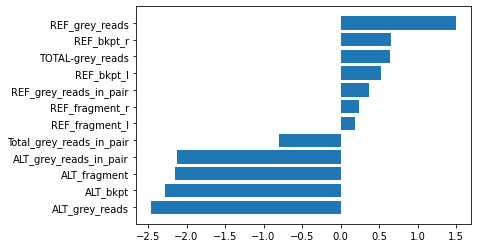

In [18]:
print(clf_logi.coef_)
feature_importances(clf_logi.coef_[0], features_names)

In [19]:
# 5-fold cross-validation
scores_logi = cross_val_score(clf_logi, X_train, y_train, cv=5)
print(scores_logi.mean())

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

0.9027027027027026


## Random Forest

1200 * 40

In [20]:
clf_rf = RandomForestClassifier(n_estimators=20, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

In [21]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[348   3   0]
 [  6 333  31]
 [  3  34 352]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       351
           1       0.90      0.90      0.90       370
           2       0.92      0.90      0.91       389

    accuracy                           0.93      1110
   macro avg       0.93      0.93      0.93      1110
weighted avg       0.93      0.93      0.93      1110

0.9306306306306307


In [22]:
# 5-fold cross-validation
scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=5)
print(scores_rf.mean())

0.925


## SVM - Support Vector Machine

### Using linear (with linear boundary) as kernel

In [23]:
"""pred=model.predict(x_test)
Model Evaluation
# Importing the classification report and confusion matrix

print(confusion_matrix(y_test,pred))
[[17  0  0]
 [ 0 16  0]
 [ 0  0 12]]
print(classification_report(y_test, pred))"""

'pred=model.predict(x_test)\nModel Evaluation\n# Importing the classification report and confusion matrix\n\nprint(confusion_matrix(y_test,pred))\n[[17  0  0]\n [ 0 16  0]\n [ 0  0 12]]\nprint(classification_report(y_test, pred))'

In [24]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
# 5-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

0.9047297297297296


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[[ 1.27713838 -1.71530294  0.7826612  -0.20363099 -1.58917533 -1.27048533
   0.41332596  0.38441862 -1.6682967   0.209445   -0.03160612 -1.78691354]
 [ 0.93200229 -1.18406639  0.61221333 -0.12094329 -0.98072663 -0.77733447
   1.0855417   1.17466279 -0.6148101  -0.28864144 -0.07270787 -0.98079149]
 [ 0.2498242  -0.30994533  0.16862042 -0.14066228  0.28870077 -0.0219193
   0.19679101  0.24784561 -0.3708471   0.29996766  0.35793856  0.11461411]]


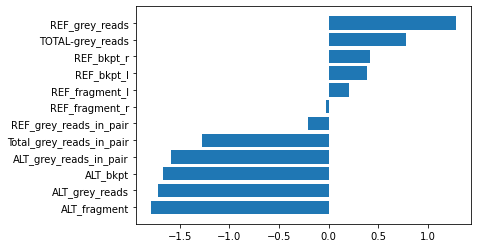

array([0, 2, 1, ..., 2, 1, 0])

In [25]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
svm_lin = clf.fit(X_train, y_train)
print(svm_lin.coef_)
feature_importances(svm_lin.coef_[0], features_names)


pred_lin = clf.predict(X_test)
pred_lin

In [26]:
# Evaluate the model
print(confusion_matrix(y_test, pred_lin))
print(classification_report(y_test, pred_lin))
print(accuracy_score(y_test, pred_lin))

[[350   1   0]
 [ 10 289  71]
 [  2  20 367]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       351
           1       0.93      0.78      0.85       370
           2       0.84      0.94      0.89       389

    accuracy                           0.91      1110
   macro avg       0.91      0.91      0.91      1110
weighted avg       0.91      0.91      0.90      1110

0.9063063063063063


### Using rbf (with non-linear boundary) as kernel

In [27]:
# Using kernel, rbf
clf = svm.SVC(kernel="rbf")
#clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())
#print('Accuracy of linear SVC on training set: {:.3f}'.format(clf.score(X_train, y_train)))
#print('Accuracy of linear SVC on test set: {:.3f}'.format(clf.score(X_test, y_test)))

0.9261261261261261


## MLP

In [28]:
clf = MLPClassifier(random_state=1, max_iter=300)
# 5-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())

0.9344594594594595


In [29]:
clf = MLPClassifier(random_state=1, max_iter=300)
mlp = clf.fit(X_train, y_train)
pred_lin = clf.predict(X_test)

In [30]:
# Evaluate the model
print(confusion_matrix(y_test, pred_lin))
print(classification_report(y_test, pred_lin))
print(accuracy_score(y_test, pred_lin))

[[349   2   0]
 [  9 337  24]
 [  2  22 365]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       351
           1       0.93      0.91      0.92       370
           2       0.94      0.94      0.94       389

    accuracy                           0.95      1110
   macro avg       0.95      0.95      0.95      1110
weighted avg       0.95      0.95      0.95      1110

0.9468468468468468
